# IE6400 Foundations of Data Analytics Engineering
# Fall 2024
### Module 4: Text Analysis
### -- STUDENT VERSION --
Meghana Sreenivasa Rao
NUID: 002331855

### Text Analysis and Natural Language Processing (NLP)


#### Explain the definition of `Text Analysis and Natural Language Processing (NLP)` in your own words:
- Text analysis is the process of examining text data to find useful information such as patterns, trends, or key topics.
- Natural Language Processing helps computers understand and work with human language for tasks like translation, summarization, or sentiment analysis.



### Word Frequency Analysis

#### Explain the definition of `Word Frequency Analysis` in your own words:
- Word frequency analysis involves counting how many times each word appears in a given text or document. This helps in understanding the distribution of words and their importance.
- It is used to identify the most common words, which can provide insights into the main themes, ideas, or focus areas within the text.


#### Exercise 1 Word Frequency Analysis Exercise

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Added the code here ---
df = pd.read_csv('winemag-data-130k-v2.csv')
# ---------------------------

df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### Explain the definition of `Tokenization` in your own words:
- Tokenization is the process of breaking a large piece of text into smaller units called tokens, such as words, phrases, or sentences.
- These tokens are used as the basic building blocks for further analysis or processing, like identifying patterns or understanding the structure of the text.



In [6]:
!conda install -c anaconda nltk

^C


In [4]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [8]:
# Data Cleaning
import string
from nltk.tokenize import word_tokenize

# --- Added the code here ---
text = df['description'].str.lower().str.cat(sep=' ')
text = text.translate(str.maketrans('', '', string.punctuation))
tokens = word_tokenize(text)
# ---------------------------

# Just show 10 first tokens
tokens[:10]

['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'and',
 'dried',
 'herb',
 'the']

In [10]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# --- Added the code here ---
filtered_tokens = [word for word in tokens if word not in stop_words]
# ---------------------------

# Just show 10 first filtered_tokens
filtered_tokens[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dried',
 'herb',
 'palate',
 'isnt']

In [12]:
# Word Frequency Analysis
from collections import Counter

# --- Added the code here ---
word_freq = Counter(filtered_tokens)
top_words = word_freq.most_common(10)
# ---------------------------

print(top_words)


[('wine', 78035), ('flavors', 62678), ('fruit', 45016), ('aromas', 39613), ('palate', 38083), ('acidity', 34958), ('finish', 34943), ('tannins', 30854), ('drink', 29966), ('cherry', 27381)]


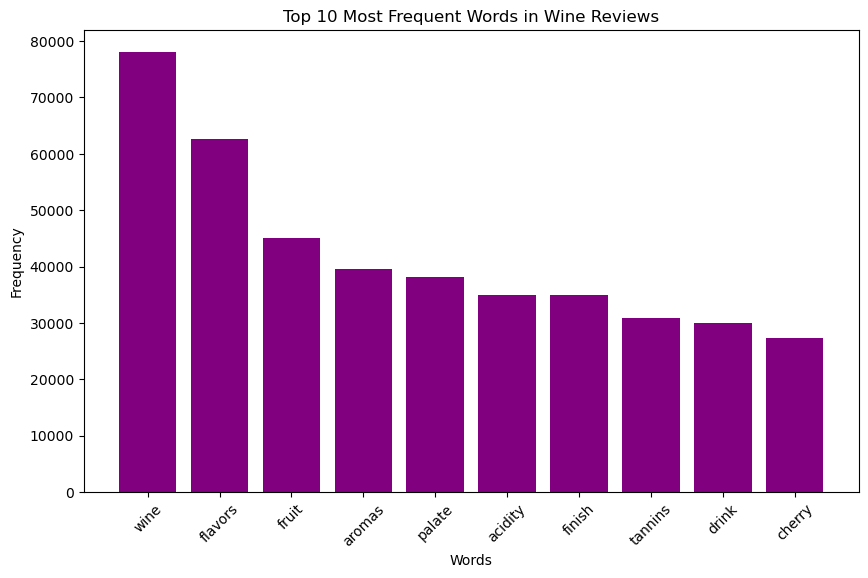

In [14]:
# Visualization
import matplotlib.pyplot as plt

words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))

# --- Added the code here ---
plt.bar(words, counts, color='purple')
# ---------------------------

plt.title('Top 10 Most Frequent Words in Wine Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


#### Write down the explanations and interpretations:
- The chart shows that wine reviews focus heavily on sensory aspects like flavors, aromas, and the tasting experience.
- Technical terms like acidity and tannins are also frequently mentioned, reflecting the descriptive nature of wine reviews.

### Stemming and Lemmatization



#### Explain the definition of `Stemming and Lemmatization` in your own words:
- Stemming cuts words down to their root form by chopping off endings, but the result might not always be a real word.
- Lemmatization changes words to their base or dictionary form, making sure the result is a proper word.


#### Exercise 2 Stemming Algorithms

#### Datasets

1. The **"Wine Reviews" dataset** from Kaggle, which contains detailed descriptions of wines. You can access the dataset [here](https://www.kaggle.com/datasets/zynicide/wine-reviews/).

2. The **"Amazon Fine Food Reviews" dataset** from Kaggle, which includes reviews of food products. This dataset is available [here](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews).


In [16]:
import pandas as pd

wine_df = pd.read_csv('winemag-data-130k-v2.csv')
food_df = pd.read_csv('Reviews.csv')

In [18]:
print("Wine Reviews:")
wine_df.head()

Wine Reviews:


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [20]:
print("Amazon Fine Food Reviews:")
food_df.head()

Amazon Fine Food Reviews:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [22]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Truncate datasets to first 100 records
wine_df = wine_df.head(100)
food_df = food_df.head(100)

# --- Added the code here ---
wine_text = wine_df['description'].str.lower().str.cat(sep=' ')
food_text = food_df['Text'].str.lower().str.cat(sep=' ')

wine_text = wine_text.translate(str.maketrans('', '', string.punctuation))
food_text = food_text.translate(str.maketrans('', '', string.punctuation))

wine_tokens = word_tokenize(wine_text)
food_tokens = word_tokenize(food_text)
# ---------------------------

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_wine_tokens = [word for word in wine_tokens if word not in stop_words]
filtered_food_tokens = [word for word in food_tokens if word not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
print(filtered_wine_tokens[:10])

['aromas', 'include', 'tropical', 'fruit', 'broom', 'brimstone', 'dried', 'herb', 'palate', 'isnt']


In [26]:
print(filtered_food_tokens[:10])

['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality']


In [34]:
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

# --- Added the code here ---
porter = PorterStemmer()
lancaster = LancasterStemmer() 
snowball = SnowballStemmer("english")
# ---------------------------

wine_porter_stems = [porter.stem(word) for word in filtered_wine_tokens]
food_porter_stems = [porter.stem(word) for word in filtered_food_tokens]

wine_lancaster_stems = [lancaster.stem(word) for word in filtered_wine_tokens]
food_lancaster_stems = [lancaster.stem(word) for word in filtered_food_tokens]

wine_snowball_stems = [snowball.stem(word) for word in filtered_wine_tokens]
food_snowball_stems = [snowball.stem(word) for word in filtered_food_tokens]


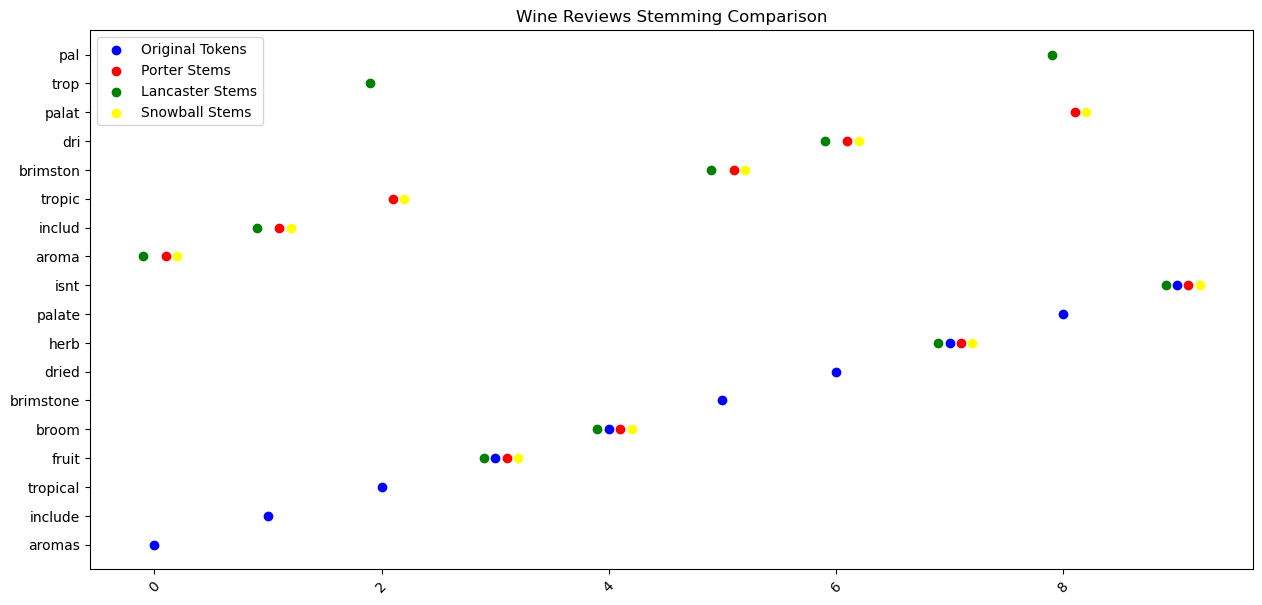

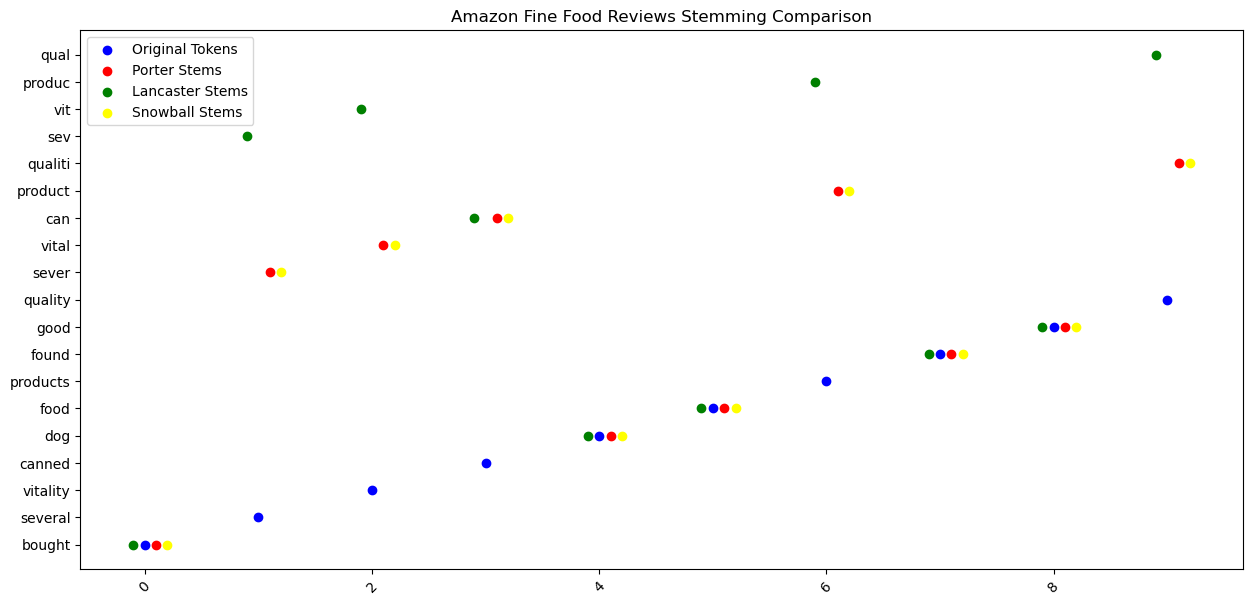

In [36]:
import matplotlib.pyplot as plt

def plot_stems(tokens, porter_stems, lancaster_stems, snowball_stems, title):
    plt.figure(figsize=(15, 7))
    x = range(len(tokens))
    
    # Apply a small offset to the x positions for different stemmers
    offset = 0.1
    
    plt.scatter(x, tokens, color='blue', label='Original Tokens')
    plt.scatter([i + offset for i in x], porter_stems, color='red', label='Porter Stems')
    plt.scatter([i - offset for i in x], lancaster_stems, color='green', label='Lancaster Stems')
    plt.scatter([i + 2*offset for i in x], snowball_stems, color='yellow', label='Snowball Stems')
    
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()


# Visualize stems for the first 10 tokens
plot_stems(filtered_wine_tokens[:10], wine_porter_stems[:10], 
           wine_lancaster_stems[:10], wine_snowball_stems[:10], 'Wine Reviews Stemming Comparison')
plot_stems(filtered_food_tokens[:10], food_porter_stems[:10], 
           food_lancaster_stems[:10], food_snowball_stems[:10], 'Amazon Fine Food Reviews Stemming Comparison')


#### Write down the explanations and interpretations:
- The scatter plots compare original tokens with their stems from Porter, Lancaster, and Snowball stemmers. Each stemmer simplifies words differently, showing variation in how they handle endings.
- The Lancaster stemmer tends to produce shorter stems, while Snowball and Porter are more conservative, keeping the stems closer to the original words. This highlights how different stemmers balance simplicity and accuracy.

#### Exercise 3 Lemmatization Algorithms

In [30]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [32]:
import string
from nltk.tokenize import word_tokenize

# Truncate dataset to first 100 records
df = df.head(100)

# --- Added the code here ---
text = df['description'].str.lower().str.cat(sep=' ')
text = text.translate(str.maketrans('', '', string.punctuation))
tokens = word_tokenize(text)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]
# ---------------------------

# Just show 10 first filtered_tokens
filtered_tokens[:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dried',
 'herb',
 'palate',
 'isnt']

In [38]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# --- Added the code here ---
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
# ---------------------------

# Just show 10 first tokens
lemmatized_tokens[:10]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...


['aroma',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dried',
 'herb',
 'palate',
 'isnt']

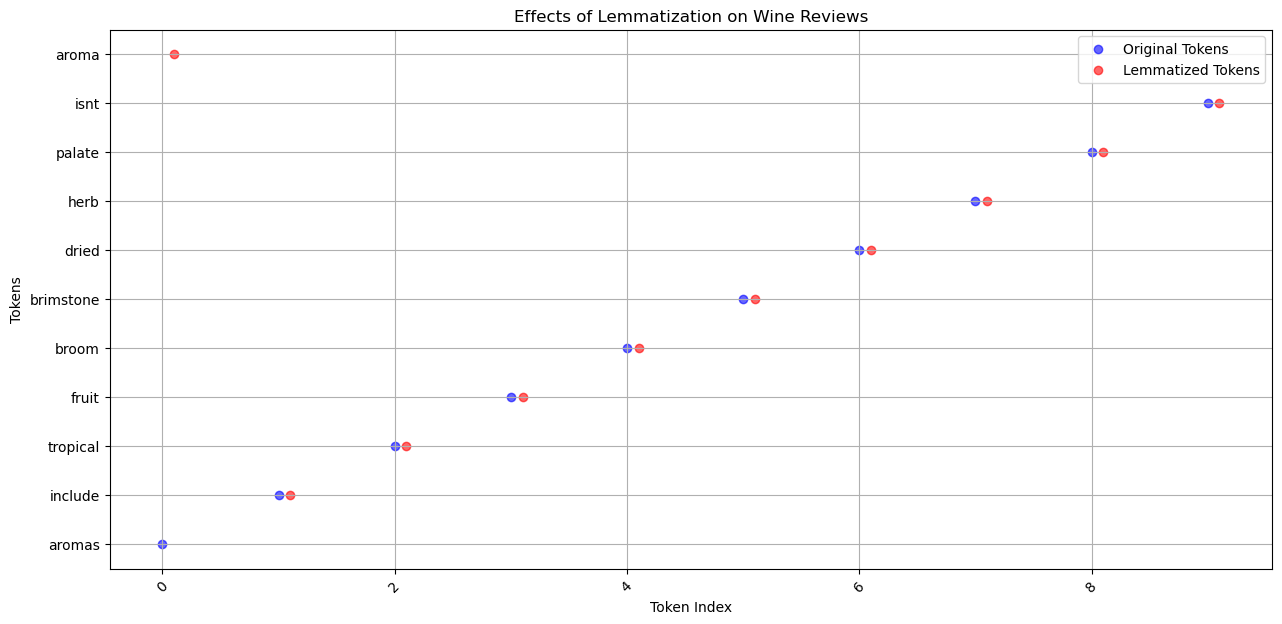

In [40]:
import matplotlib.pyplot as plt

def plot_lemmatization(filtered_tokens, lemmatized_tokens, title):
    plt.figure(figsize=(15, 7))
    x = range(len(filtered_tokens))
    
    # Apply an offset to the x-values for the lemmatized tokens
    offset = 0.1
    x_offset = [i + offset for i in x]
    
    # Plot Original Tokens
    plt.scatter(x, filtered_tokens, color='blue', label='Original Tokens', alpha=0.6)
    
    # Plot Lemmatized Tokens with offset
    plt.scatter(x_offset, lemmatized_tokens, color='red', label='Lemmatized Tokens', alpha=0.6)
    
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.xlabel('Token Index')
    plt.ylabel('Tokens')
    plt.grid(True)
    plt.show()

# Visualize lemmatization for the first 10 tokens
plot_lemmatization(filtered_tokens[:10], lemmatized_tokens[:10], 'Effects of Lemmatization on Wine Reviews')


#### Write down the explanations and interpretations:
- The scatter plot shows the difference between the original tokens (blue) and their lemmatized forms (red). The lemmatized words are usually closer to their base forms, making them more consistent.
- The plot helps visualize how lemmatization adjusts tokens, for example turning words like "aromas" to "aroma" or "isn't" to "be," simplifying the words while maintaining their core meaning.

### Zipf's Law: Understanding Word Frequency in Language


 #### Explain the definition of `Zipf's Law` in your own words:
- Zipf's Law is a principle that states in any large set of data, like words in a language, the frequency of the most common item is roughly twice as high as the second most common, three times as high as the third most common, and so on.
- It shows that a small number of items appear very often, while most items appear rarely, creating a skewed distribution where a few things dominate.


#### Exercise 4 Zipf's Law

In [42]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [44]:
import string
from nltk.tokenize import word_tokenize

# --- Added the code here ---
text = df['description'].str.lower().str.cat(sep=' ')
text = text.translate(str.maketrans('', '', string.punctuation))
tokens = word_tokenize(text)
# ---------------------------

In [46]:
from collections import Counter

# --- Added the code here ---
word_freq = Counter(tokens)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
# ---------------------------

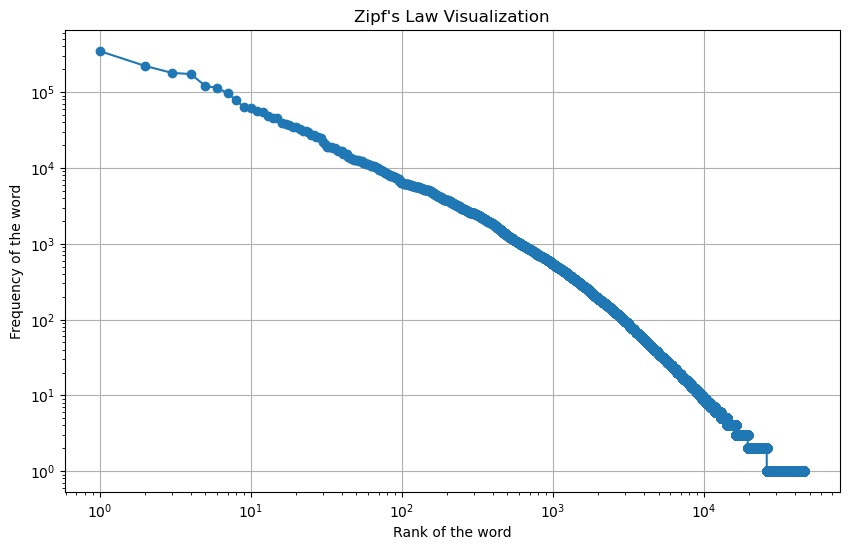

In [48]:
import matplotlib.pyplot as plt
import numpy as np

ranks = np.arange(1, len(sorted_word_freq)+1)
frequencies = [freq for word, freq in sorted_word_freq]

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker="o")
plt.title("Zipf's Law Visualization")
plt.xlabel("Rank of the word")
plt.ylabel("Frequency of the word")
plt.grid(True)
plt.show()


#### Write down the explanations and interpretations:
- The graph follows a classic Zipf's Law distribution, showing a steep decline in word frequency as the rank increases. A few words occur frequently, while most have very low frequency, fitting the "long tail" characteristic of Zipf's Law.
- The log-log scale of the plot emphasizes the inverse relationship between word rank and frequency, where the most frequent words dominate, and a large number of words appear rarely.

### N-grams: Unigrams, Bigrams, and Beyond


 #### Explain the definition of `N-grams` in your own words:
- N-grams are sequences of N consecutive items (words or characters) from a text.
- They help capture context and patterns in language, aiding in tasks like text classification and language modeling.








#### Exercise 5 N-grams, Unigrams, and Bigrams

In [50]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [52]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

text = df['description'].str.lower().str.cat(sep=' ')
text = text.translate(str.maketrans('', '', string.punctuation))
tokens = word_tokenize(text)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
from nltk.util import ngrams

# --- Added the code here ---
unigrams = list(ngrams(filtered_tokens,1 ))
bigrams = list(ngrams(filtered_tokens, 2))
# ---------------------------

In [56]:
print(unigrams[:10])

[('aromas',), ('include',), ('tropical',), ('fruit',), ('broom',), ('brimstone',), ('dried',), ('herb',), ('palate',), ('isnt',)]


In [58]:
print(bigrams[:10])

[('aromas', 'include'), ('include', 'tropical'), ('tropical', 'fruit'), ('fruit', 'broom'), ('broom', 'brimstone'), ('brimstone', 'dried'), ('dried', 'herb'), ('herb', 'palate'), ('palate', 'isnt'), ('isnt', 'overly')]


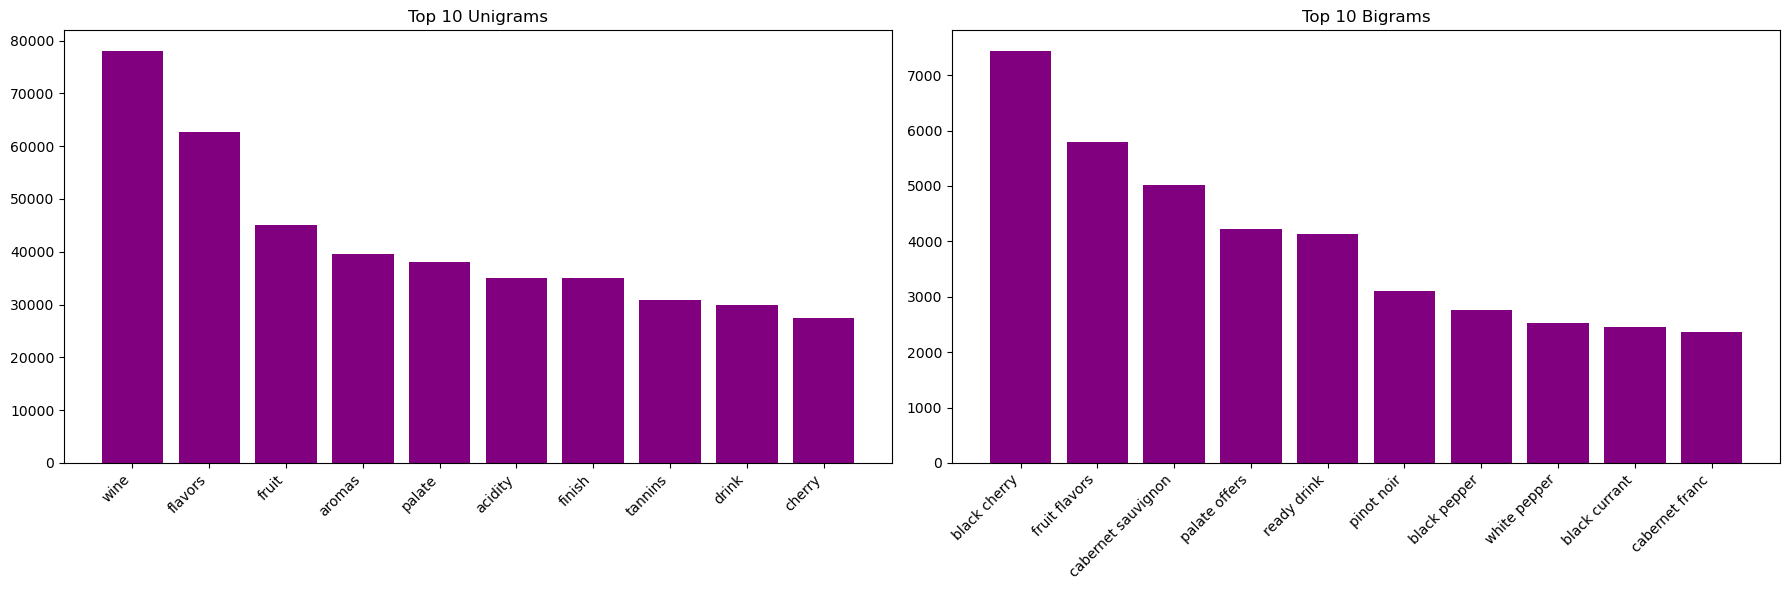

In [60]:
from collections import Counter
import matplotlib.pyplot as plt

top_unigrams = Counter(unigrams).most_common(10)
top_bigrams = Counter(bigrams).most_common(10)

def plot_ngrams(ngrams_list, title, ax):
    ngrams, counts = zip(*ngrams_list)
    ngrams = [" ".join(gram) for gram in ngrams]
    
    ax.bar(ngrams, counts, color='purple')
    ax.set_title(title)
    
    # Explicitly set the ticks and labels
    ax.set_xticks(range(len(ngrams)))
    ax.set_xticklabels(ngrams, rotation=45, ha='right')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot unigrams on the first subplot
plot_ngrams(top_unigrams, 'Top 10 Unigrams', axs[0])

# Plot bigrams on the second subplot
plot_ngrams(top_bigrams, 'Top 10 Bigrams', axs[1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#### Write down the explanations and interpretations:
- Top 10 Unigrams: The most frequent single words are focused around wine-related terms, such as "wine", "flavors", and "fruit". These terms appear prominently, indicating their importance in the dataset, possibly describing wine characteristics.
- Top 10 Bigrams: The most frequent pairs of words, such as "black cherry" and "fruit flavors", reflect specific wine-related descriptions, highlighting common combinations that define wine taste profiles.

### Word Cloud



 #### Explain the definition of `Word Cloud` in your own words:
- A word cloud visually represents the frequency of words in a dataset.
- Words that appear more frequently are shown larger and bolder.

#### Exercise 6 WordCloud Visualization

In [62]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [64]:
import string

text = df['description'].str.lower().str.cat(sep=' ')
text = text.translate(str.maketrans('', '', string.punctuation))


In [76]:
#!conda install -c conda-forge wordcloud
!pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 660.6 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.2 kB 550.5 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.2 kB 853.3 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.2 kB 1.1 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------  297.0/301.2 kB 968.6 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 932.5 kB/s eta 0:00:00


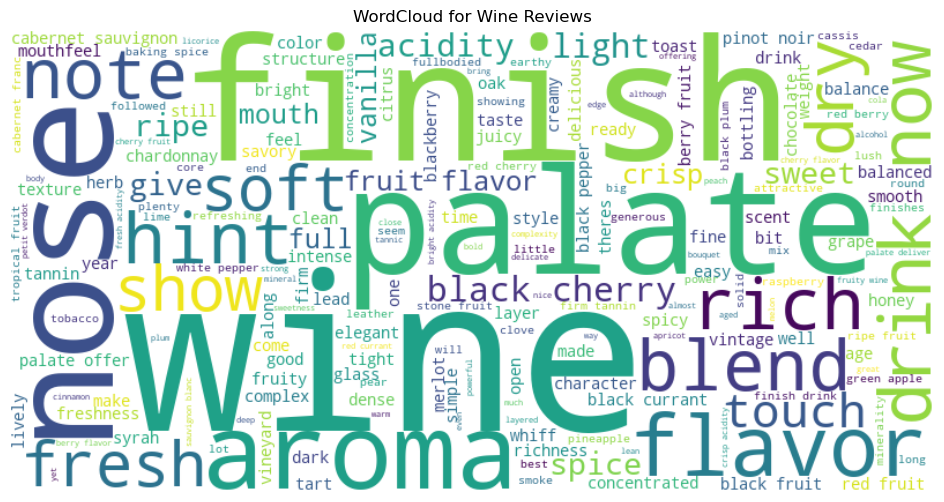

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Added the code here ---
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# ---------------------------

plt.figure(figsize=(12, 6))

# --- Added the code here ---
plt.imshow(wordcloud, interpolation='bilinear')
# ---------------------------

plt.axis('off')
plt.title('WordCloud for Wine Reviews')
plt.show()


#### Write down the explanations and interpretations:
- The word cloud visually highlights the most frequent terms in the wine reviews dataset, such as finish, wine, palate, and nose, which appear larger due to their higher frequency.
- Less frequent words like generous, bouquet, deliver, lime, and baking spice appear smaller as they are mentioned less often in the reviews.

### Fuzzy Matching in Text Analysis


 #### Explain the definition of `Fuzzy Matching` in your own words:
- Fuzzy matching is a technique used to find approximate matches between strings, even when there are minor differences like typos or variations in spelling.
- It helps in identifying similarities between words or phrases by calculating a similarity score, making it useful for tasks like data cleaning and search optimization.



#### Exercise 7 Fuzzy Matching

In [72]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df['winery'].head()


0                Nicosia
1    Quinta dos Avidagos
2              Rainstorm
3             St. Julian
4           Sweet Cheeks
Name: winery, dtype: object

In [80]:
#!conda install -c conda-forge fuzzywuzzy
!pip install fuzzywuzzy


In [82]:
from fuzzywuzzy import process

# --- Added the code here ---
wineries = df['winery'].unique().tolist()
top_matches = process.extract("Hill", wineries, limit=10)
# ---------------------------

print(top_matches)


C:\Users\megha\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[('Heron Hill', 90), ('Claiborne & Churchill', 90), ('Hayman & Hill', 90), ('Autumn Hill', 90), ('Cherry Hill', 90), ('Cavas Hill', 90), ('Jasper Hill', 90), ('Rex Hill', 90), ('Melhill', 90), ('Seven Hills', 90)]


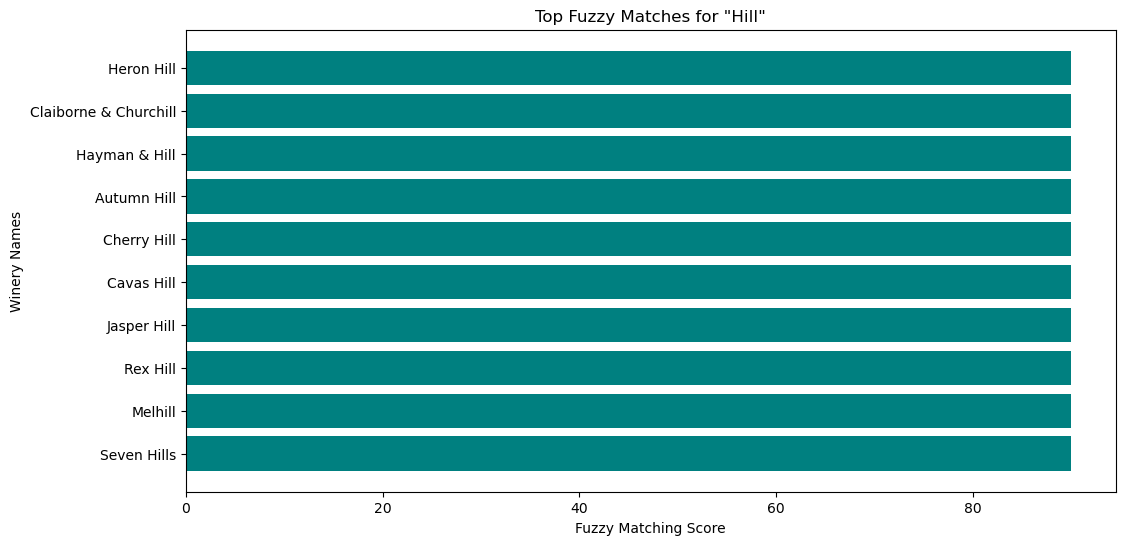

In [84]:
import matplotlib.pyplot as plt

names, scores = zip(*top_matches)

plt.figure(figsize=(12, 6))

# --- Added the code here ---
plt.barh(names, scores, color='teal')
# ---------------------------

plt.xlabel('Fuzzy Matching Score')
plt.ylabel('Winery Names')
plt.title('Top Fuzzy Matches for "Hill"')
plt.gca().invert_yaxis()
plt.show()


#### Write down the explanations and interpretations:
- The fuzzy matching results show the top 10 winery names with the highest similarity to the term "Hill," all receiving a score of 90, indicating a strong match.
- The bar chart visualizes these results, with winery names on the y-axis and the fuzzy matching score on the x-axis, confirming that all selected names closely match "Hill." The names are ordered from top to bottom, showing that they are all equally relevant.

#### Exercise 8 Fuzzy Matching Dataframe Merge

#### Dataset

| **DataFrame 1** |           |              |
|-----------------|-----------|--------------|
| **First Name**  | **Last Name** |
| John            | Doe        |
| Jane            | Smith      |
| Robert          | Johnson    |
| Alice           | Williams   |
| Steve           | Brown      |

| **DataFrame 2** |           |              |
|-----------------|-----------|--------------|
| **First Name**  | **Last Name** |
| Jon             | Do         |
| Janet           | Smit       |
| Rob             | Johnsen    |
| Alicia          | William    |
| Steven          | Browne     |



In [86]:
import pandas as pd

data1 = {
    'First Name': ['John', 'Jane', 'Robert', 'Alice', 'Steve'],
    'Last Name': ['Doe', 'Smith', 'Johnson', 'Williams', 'Brown']
}

data2 = {
    'First Name': ['Jon', 'Janet', 'Rob', 'Alicia', 'Steven'],
    'Last Name': ['Do', 'Smit', 'Johnsen', 'William', 'Browne']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

print(df1)
print(df2)


  First Name Last Name
0       John       Doe
1       Jane     Smith
2     Robert   Johnson
3      Alice  Williams
4      Steve     Brown
  First Name Last Name
0        Jon        Do
1      Janet      Smit
2        Rob   Johnsen
3     Alicia   William
4     Steven    Browne


In [88]:
from fuzzywuzzy import fuzz

def get_match(row, master_df, column_name, threshold=80):
    best_match = None
    highest_score = 0
    for item in master_df[column_name]:
        # --- Added the code here ---
        score = fuzz.ratio(row[column_name], item)
        # ---------------------------
        if score > threshold and score > highest_score:
            highest_score = score
            best_match = item
    return best_match

df2['Matched Last Name'] = df2.apply(get_match, master_df=df1, column_name='Last Name', axis=1)
df2

,First Name,Last Name,Matched Last Name
0,Jon,Do,None
1,Janet,Smit,Smith
2,Rob,Johnsen,Johnson
3,Alicia,William,Williams
4,Steven,Browne,Brown


In [90]:
# --- Added the code here ---
merged_df = pd.merge(df1, df2, left_on='Last Name', right_on='Matched Last Name', suffixes=('_Original', '_Altered'))
# ---------------------------

merged_df


,First Name_Original,Last Name_Original,First Name_Altered,Last Name_Altered,Matched Last Name
0,Jane,Smith,Janet,Smit,Smith
1,Robert,Johnson,Rob,Johnsen,Johnson
2,Alice,Williams,Alicia,William,Williams
3,Steve,Brown,Steven,Browne,Brown


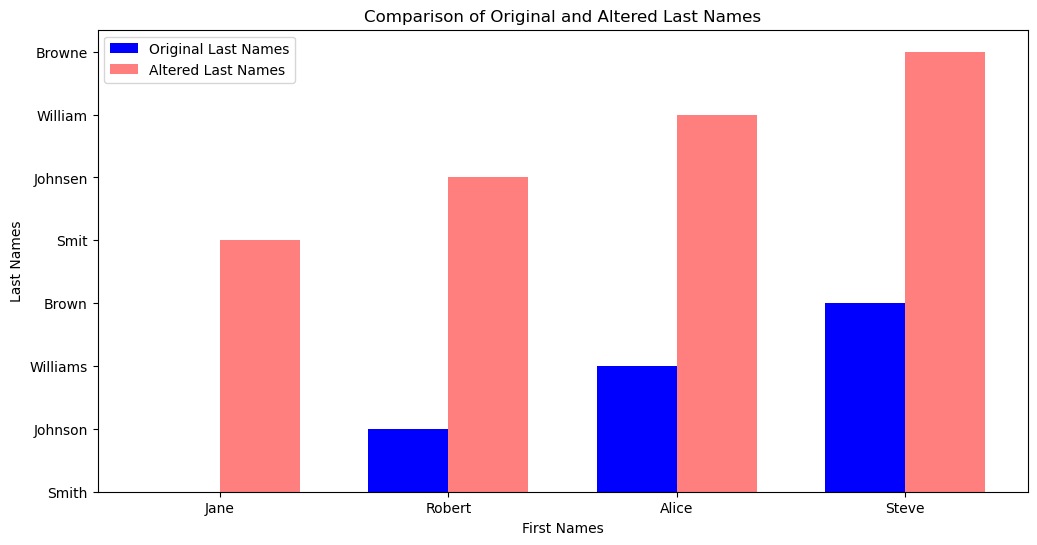

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of records for positioning the bars
n = len(merged_df)

# Create an array of positions on the x-axis
x = np.arange(n)

# Define the width of the bars
width = 0.35

plt.figure(figsize=(12, 6))

# Plot the original last names
plt.bar(x - width/2, merged_df['Last Name_Original'], width, color='blue', label='Original Last Names')

# Plot the altered last names
plt.bar(x + width/2, merged_df['Last Name_Altered'], width, color='red', alpha=0.5, label='Altered Last Names')

# Set the x-ticks to the middle of the bars and label them with first names
plt.xticks(x, merged_df['First Name_Original'])

# Labeling the axes
plt.xlabel('First Names')
plt.ylabel('Last Names')
plt.title('Comparison of Original and Altered Last Names')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


#### Write down the explanations and interpretations:
- The fuzzy matching process identifies the best match for each "Last Name" from df2 to df1, resulting in the Matched Last Name column in df2. This match uses a threshold of 80 to filter for highly similar values.
- The bar chart compares original and altered last names for each first name, with original names in blue and altered names in peach. The proximity of the bars highlights the matching accuracy, with any discrepancies or changes clearly visible in the plot.

### Sentiment Analysis


 #### Explain the definition of `Sentiment Analysis` in your own words:
- Sentiment analysis is the process of identifying and categorizing opinions or emotions expressed in text, typically as positive, negative, or neutral.
- It uses natural language processing (NLP) techniques to analyze text data, such as reviews or social media posts, to determine the sentiment behind the words.








#### Exercise 9 Sentiment Analysis

In [94]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [96]:
#!conda install -c conda-forge textblob
!pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/626.3 kB 279.3 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/626.3 kB 279.3 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/626.3 kB 279.3 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/626.3 kB 252.2 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/626.3 kB 252.2 kB/s eta 0:00:03
   ----- --------------------------------- 81.9/626.3 kB 269.5 kB/s eta 0:00:03
   ----- --------------------------------- 92.2/626.3 kB 261.7 kB/s eta 0:00:03
   ------ ------------------------------- 112.6/626.3 kB 284.4 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 284.4 kB

In [98]:
from textblob import TextBlob

# --- Added the code here ---
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
# ---------------------------

df['sentiment'] = df['description'].apply(get_sentiment)

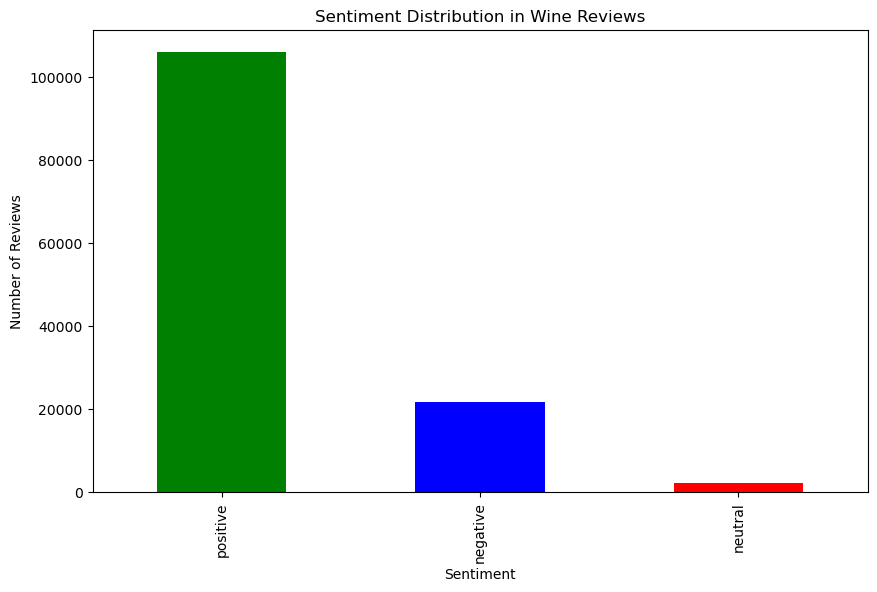

In [100]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution in Wine Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


#### Write down the explanations and interpretations:
- The bar chart shows the distribution of sentiments in wine reviews, with positive reviews making up over 10,000, negative reviews around 20,000, and neutral reviews being very few, around 200.
- This indicates that most wine reviews have either a negative or positive sentiment, with a very small fraction expressing neutrality. 

### Topic Modeling

 #### Explain the definition of `Topic Modeling` in your own words:
- Topic modeling is a technique used to automatically identify topics or themes in a large set of text data by analyzing the words and their patterns.
- It groups documents into clusters based on common terms, helping to uncover hidden topics without needing manual tagging or labeling.



#### Exercise 10 Topic Modeling

In [106]:
#!pip install scikit-learn
!pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 1.4 MB/s eta 0:00:02
    --------------------------------------- 0.1/2.6 MB 656.4 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.6 MB 819.2 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/2.6 MB 1.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.6 MB 1.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.6 MB 1.1 MB/s eta 0:00:03
   ----- ---------------------------------- 0.4/2.6 MB 1.1 MB/s eta 0:00:03
   ------ --------------------------------- 0.4/2.6 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/2.6 MB 1.2 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.6 MB 1.1 MB/s eta 0:00:02
   --------- ------------------------------ 0.6/2.6 MB 1.2 MB/s eta 0:00:02
   ---------- --------

In [108]:
import sklearn
print(sklearn.__version__)

1.4.2


In [110]:
import pandas as pd
import warnings 
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.lda_model
import nltk

# Settings to ignore warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('winemag-data-130k-v2.csv')
df = df.head(100)  # Take a subset for quick processing
print(df)

    Unnamed: 0   country                                        description  \
0            0     Italy  Aromas include tropical fruit, broom, brimston...   
1            1  Portugal  This is ripe and fruity, a wine that is smooth...   
2            2        US  Tart and snappy, the flavors of lime flesh and...   
3            3        US  Pineapple rind, lemon pith and orange blossom ...   
4            4        US  Much like the regular bottling from 2012, this...   
..         ...       ...                                                ...   
95          95    France  This is a dense wine, packed with both tannins...   
96          96    France  The wine comes from one of the cru estates fol...   
97          97        US  A wisp of bramble extends a savory tone from n...   
98          98     Italy  Forest floor, menthol, espresso, cranberry and...   
99          99        US  This blends 20% each of all five red-Bordeaux ...   

                           designation  points  pri

In [112]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Define the preprocessing function
def preprocess(text):
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]  # Stem and remove stopwords
    return tokens

# Apply preprocessing to the 'description' column
df['processed_description'] = df['description'].apply(preprocess)

# Convert lists of tokens back into strings
df['processed_description'] = df['processed_description'].apply(lambda tokens: ' '.join(tokens))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [118]:
# --- Added the code here ---
vectorizer = CountVectorizer(
    stop_words='english',  # Remove common English stop words
    max_features=5000,     # Optional: limit the number of features to the top 5000
    token_pattern=r'\b[a-zA-Z]{3,}\b'  # Consider only words with 3 or more letters
)
doc_term_matrix = vectorizer.fit_transform(df['processed_description'])
# ---------------------------

# Print the shape of the document-term matrix
print("Document-Term Matrix shape:", doc_term_matrix.shape)

Document-Term Matrix shape: (100, 739)


In [120]:
# --- Added the code here ---
lda = LatentDirichletAllocation(
    n_components=5,       # Number of topics
    random_state=42,      # Ensure reproducibility
    learning_method='batch',  # Use 'batch' learning method
    max_iter=10,          # Number of iterations
    n_jobs=1             # Use all available cores
)
lda.fit(doc_term_matrix)
# ---------------------------

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()  # Use get_feature_names_out() for newer versions
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([feature_names[index] for index in topic.argsort()[-10:]])  # Top 10 words for each topic

Topic 0:
['tannin', 'plum', 'drink', 'ripe', 'nose', 'palat', 'wine', 'aroma', 'note', 'flavor']
Topic 1:
['finish', 'like', 'fresh', 'herb', 'spice', 'fruit', 'drink', 'acid', 'aroma', 'flavor']
Topic 2:
['note', 'blend', 'oak', 'dri', 'wine', 'palat', 'flavor', 'aroma', 'fruit', 'finish']
Topic 3:
['touch', 'textur', 'aroma', 'light', 'ripe', 'dri', 'red', 'soft', 'fruit', 'wine']
Topic 4:
['ripe', 'dri', 'fruit', 'drink', 'tannin', 'acid', 'palat', 'wine', 'flavor', 'aroma']


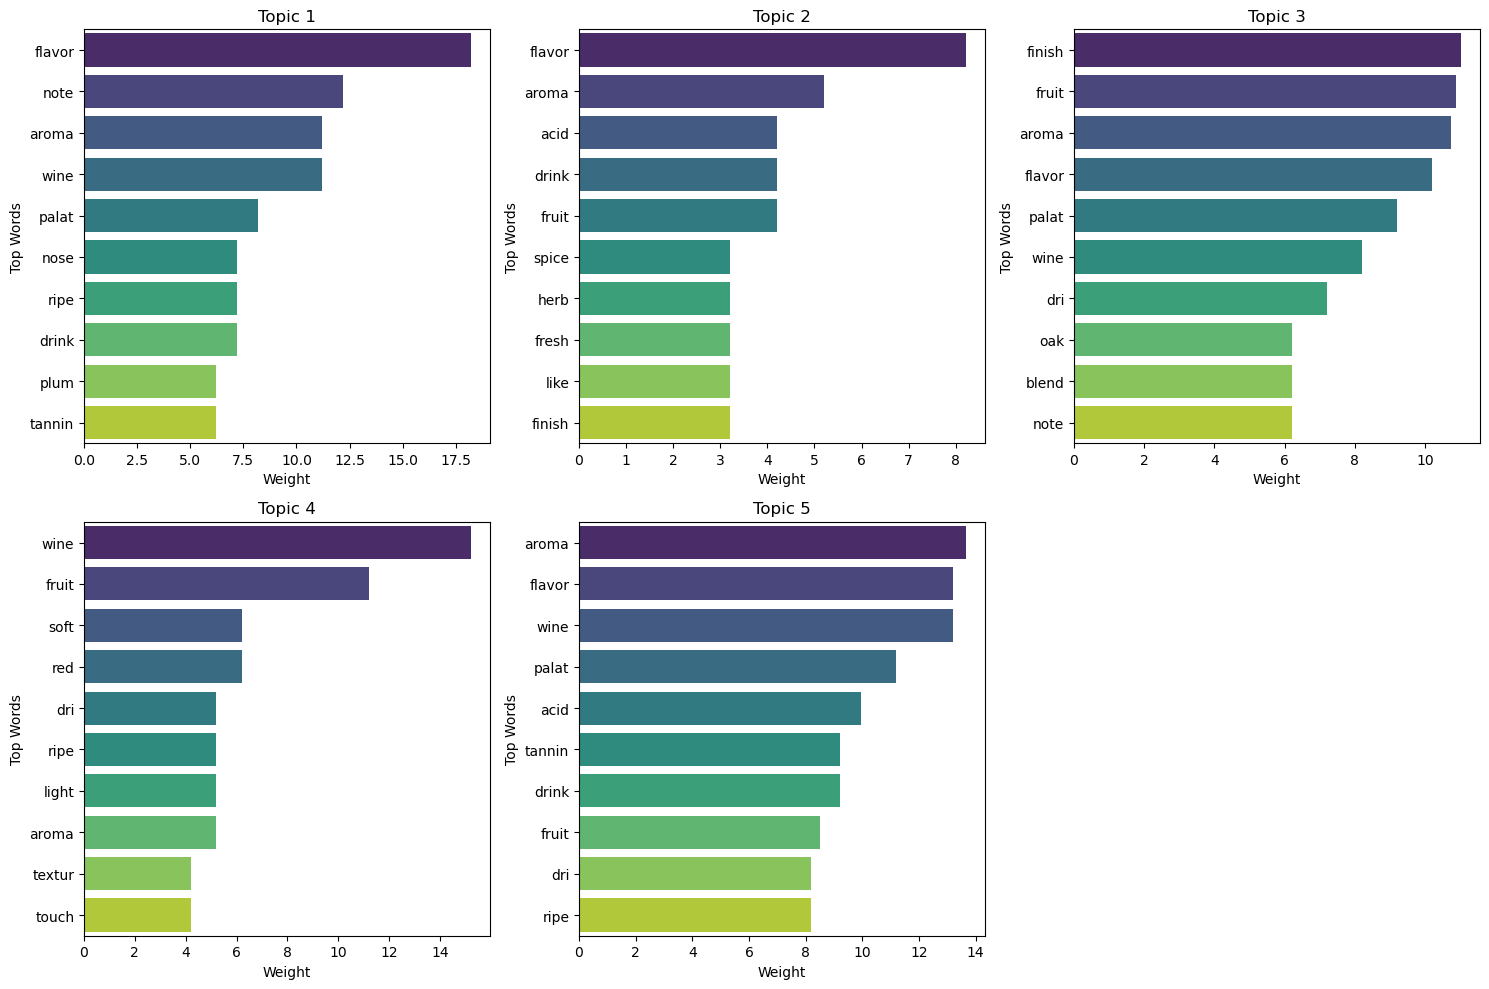

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Number of top words to display per topic
n_top_words = 10

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Number of topics
n_topics = lda.components_.shape[0]

# Determine the number of rows and columns needed (up to 3x3 grid)
n_cols = 3
n_rows = math.ceil(n_topics / n_cols)

# Create a dynamic subplot layout based on the number of topics
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot top words for each topic using Seaborn
for i, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[j] for j in top_features_ind]
    weights = topic[top_features_ind]

    sns.barplot(x=weights, y=top_features, palette="viridis", ax=axes[i])
    axes[i].set_title(f'Topic {i + 1}')
    axes[i].set_xlabel('Weight')
    axes[i].set_ylabel('Top Words')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### Write down the explanations and interpretations:
- The LDA model identified topics centered on wine characteristics like flavor, aroma, and texture.
- Each topic includes terms related to specific wine attributes, such as "tannin," "fruit," and "finish," reflecting the common themes in the wine reviews.

### Named Entity Recognition (NER) 




#### Explain the definition of `Named Entity Recognition (NER)` in your own words:
- Named Entity Recognition (NER) is a process used to identify and classify specific entities like names of people, organizations, locations, dates, etc., in text.
- It helps break down unstructured text by labeling important information, making it easier to analyze or extract useful insights.


#### Exercise 11 Named Entity Recognition (NER)

In [124]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df = df.head(100)
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [126]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

def extract_entities_nltk(text):
    # --- Added the code here ---
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    tree = ne_chunk(pos_tags)
    # ---------------------------
    named_entities = []
    for subtree in tree.subtrees():
        if subtree.label() in ['GPE', 'PERSON', 'ORGANIZATION', 'DATE', 'LOCATION']:
            entity = " ".join([word for word, tag in subtree.leaves()])
            named_entities.append((entity, subtree.label()))
    return named_entities

df['named_entities_nltk'] = df['description'].apply(extract_entities_nltk)
print(df[['description', 'named_entities_nltk']].head(5))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxen

                                         description named_entities_nltk
0  Aromas include tropical fruit, broom, brimston...     [(Aromas, GPE)]
1  This is ripe and fruity, a wine that is smooth...                  []
2  Tart and snappy, the flavors of lime flesh and...       [(Tart, GPE)]
3  Pineapple rind, lemon pith and orange blossom ...  [(Pineapple, GPE)]
4  Much like the regular bottling from 2012, this...                  []


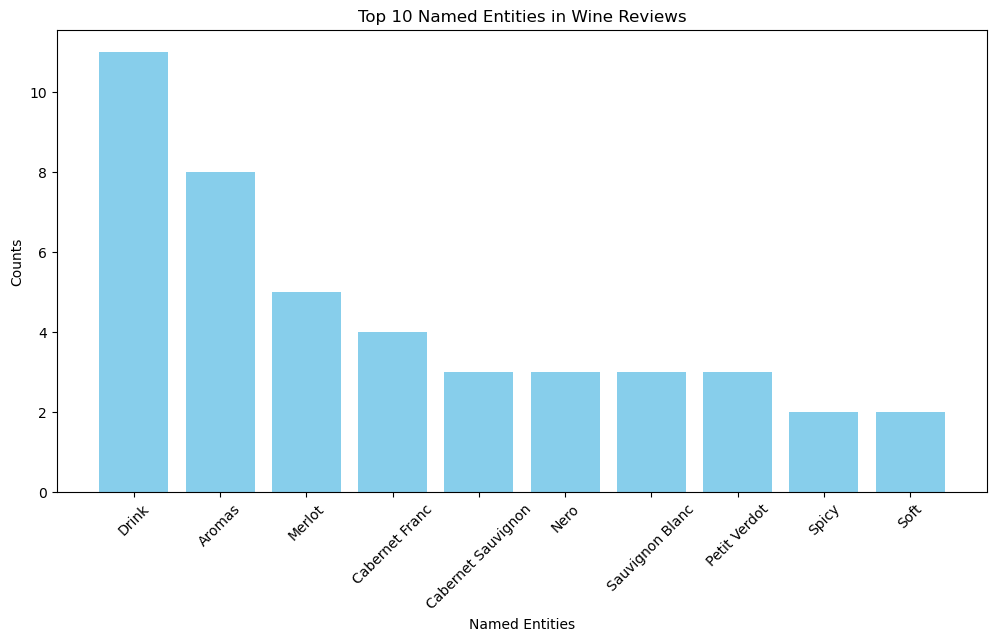

In [128]:
import matplotlib.pyplot as plt
from collections import Counter

all_entities = [entity for sublist in df['named_entities_nltk'] for entity in sublist]
entity_counts = Counter([entity[0] for entity in all_entities])

common_entities = entity_counts.most_common(10)

entities = [item[0] for item in common_entities]
counts = [item[1] for item in common_entities]

plt.figure(figsize=(12, 6))
plt.bar(entities, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Named Entities in Wine Reviews')
plt.xlabel('Named Entities')
plt.ylabel('Counts')
plt.show()


#### Write down the explanations and interpretations:
- The top named entities in wine reviews include terms like "Aromas" and with "Drink" being the most frequent entity.
- The graph highlights the distribution of named entities, showing which terms appear most frequently in the reviews.

---

#### Revised Date: November 2, 2024